In [ ]:
!pip install matplotlib

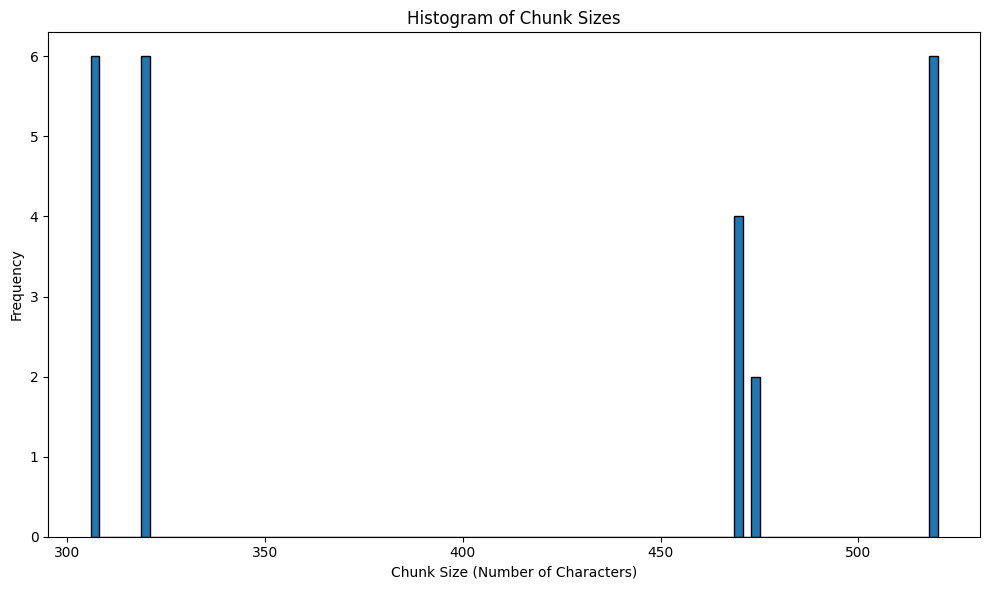

Filename: file
Page Number: 1
# Introduction
Welcome to this example text file. This file contains markdown content to demonstrate the chunk creation process.

## What is Markdown?
Markdown is a lightweight markup language that allows you to format text using simple syntax. It is commonly used for documentation, web content, and more.
---
Filename: file
Page Number: 1
# Introduction
Welcome to this example text file. This file contains markdown content to demonstrate the chunk creation process.

## Why Use Markdown?
Markdown offers several benefits:
- It is easy to learn and use.
- It produces clean and readable content.
- It can be converted to various formats like HTML, PDF, etc.
---
Filename: file
Page Number: 1
# Getting Started
To get started with Markdown, you need a text editor that supports Markdown syntax highlighting. Some popular options include:
- Visual Studio Code
- Sublime Text
- Atom

## Basic Syntax
Here are some basic Markdown syntax examples:
- Headings: Use `#` for 

In [38]:
import os
import re
import matplotlib.pyplot as plt

def create_chunks(folder_path):
    chunks = []
    chunk_sizes = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as file:
                content = file.read()
                pages = re.split(r'(?m)^######\s', content)

                # Handle the first page separately
                first_page = pages[0]
                sections = re.split(r'(?m)^#\s', first_page)

                for section in sections[1:]:  # Skip the first empty section
                    lines = section.strip().split('\n')
                    title = lines[0].strip()
                    text = '\n'.join(lines[1:])

                    subsections = re.split(r'(?m)^##\s', text)
                    parent_text = subsections[0].strip()

                    for subsection in subsections[1:]:
                        sublines = subsection.strip().split('\n')
                        subtitle = sublines[0].strip()
                        subtext = '\n'.join(sublines[1:])

                        chunk = {
                            'filename': filename[0:-4],
                            'page_num': 1,
                            'content': f"# {title}\n{parent_text}\n\n## {subtitle}\n{subtext}"
                        }
                        chunks.append(chunk)
                        chunk_sizes.append(len(chunk['content']))

                # Process the remaining pages
                for page_num, page in enumerate(pages[1:], start=2):
                    sections = re.split(r'(?m)^#\s', page)

                    for section in sections[1:]:  # Skip the first empty section
                        lines = section.strip().split('\n')
                        title = lines[0].strip()
                        text = '\n'.join(lines[1:])

                        subsections = re.split(r'(?m)^##\s', text)
                        parent_text = subsections[0].strip()

                        for subsection in subsections[1:]:
                            sublines = subsection.strip().split('\n')
                            subtitle = sublines[0].strip()
                            subtext = '\n'.join(sublines[1:])

                            chunk = {
                                'filename': filename[0:-4],
                                'page_num': page_num,
                                'content': f"# {title}\n{parent_text}\n\n## {subtitle}\n{subtext}"
                            }
                            chunks.append(chunk)
                            chunk_sizes.append(len(chunk['content']))

    # Create a histogram of chunk sizes
    plt.figure(figsize=(10, 6))
    plt.hist(chunk_sizes, bins=100, edgecolor='black')
    plt.xlabel('Chunk Size (Number of Characters)')
    plt.ylabel('Frequency')
    plt.title('Histogram of Chunk Sizes')
    plt.tight_layout()
    plt.show()

    return chunks

# Usage example
folder_path = './txt'
chunks = create_chunks(folder_path)

# Print the chunks
for chunk in chunks:
    print(f"Filename: {chunk['filename']}")
    print(f"Page Number: {chunk['page_num']}")
    print(chunk['content'])
    print("---")

In [39]:
#save chunks as pickle file
import pickle

def save_chunks(chunks, output_file):
    with open(output_file, 'wb') as file:
        pickle.dump(chunks, file)           
        print(f"Chunks saved to '{output_file}'")

# Usage example
output_file = 'chunks.pkl'
save_chunks(chunks, output_file)



Chunks saved to 'chunks.pkl'
